# Mount GDrive

In [ ]:
# Mounting Dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Call the dataset from GDrive

In [ ]:
# Mengesktrak Dataset dari bentuk zip ke bentuk file biasa
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/datasets/skripsi/skenario-1.zip", 'r')
zip_ref.extractall("/content/klasifikasi-gandum")
zip_ref.close()

# Preprocessing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path ='/content/klasifikasi-gandum/train'
data_test_path ='/content/klasifikasi-gandum/test'

In [ ]:
img_width = 640
img_height = 640

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 435 files belonging to 3 classes.


In [ ]:
data_train.class_names

['healthy', 'septoria', 'stripe_rust']

In [ ]:
data_cat = data_train.class_names

In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory (
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 146 files belonging to 3 classes.


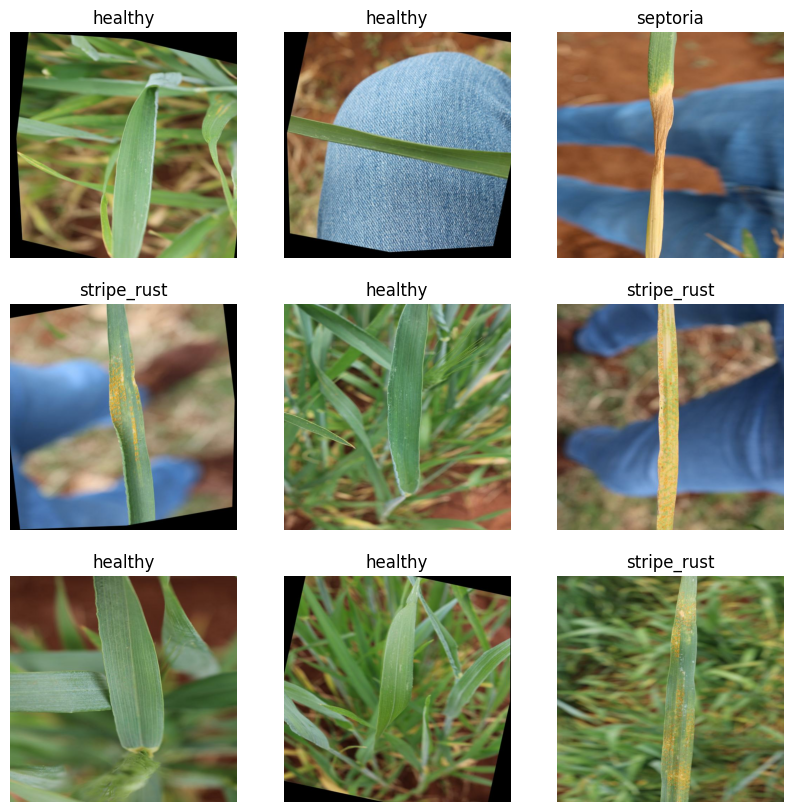

In [ ]:
plt.figure(figsize=(10, 10))
for image, label in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[label[i]])
        plt.axis("off")

# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs_size = 50
history = model.fit(
    data_train,
    validation_data=data_test,
    epochs=epochs_size
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 240s 17s/step - accuracy: 0.4113 - loss: 3.0479 - val_accuracy: 0.5822 - val_loss: 0.8936
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 265s 17s/step - accuracy: 0.5759 - loss: 0.8720 - val_accuracy: 0.6233 - val_loss: 0.7461
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 233s 17s/step - accuracy: 0.7839 - loss: 0.5164 - val_accuracy: 0.6096 - val_loss: 0.8100
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 274s 18s/step - accuracy: 0.6840 - loss: 0.6503 - val_accuracy: 0.8425 - val_loss: 0.5190
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 253s 17s/step - accuracy: 0.9047 - loss: 0.3162 - val_accuracy: 0.8836 - val_loss: 0.3211
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 259s 17s/step - accuracy: 0.9252 - loss: 0.1999 - val_accuracy: 0.8425 - val_loss: 0.3776
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 242s 17s/step - accuracy: 0.9426 - loss: 0.1559 - val_accuracy: 0.9110 - val_loss: 0.3674
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 255s 17s/step - accuracy: 0.9863 - loss: 0.0753 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

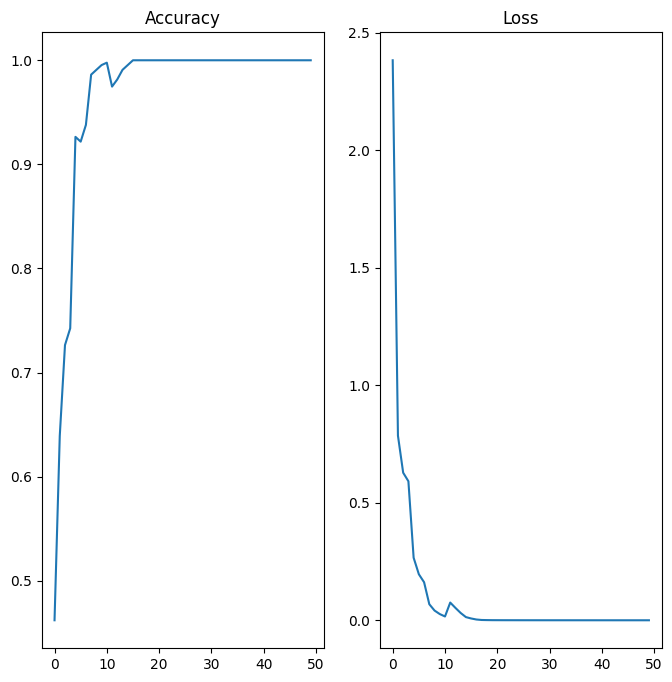

In [ ]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.title('Loss')

# Find Accuracy and Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report

# Convert TensorFlow datasets to NumPy arrays
y_true = np.concatenate([y for x, y in data_test], axis=0)
y_pred = np.concatenate([model.predict(x).argmax(axis=1) for x, y in data_test], axis=0)

# Generate and print classification report
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

           0       0.33      0.37      0.35        51
           1       0.36      0.38      0.37        48
           2       0.26      0.21      0.23        47

    accuracy                           0.32       146
   macro avg       0.32      0.32      0.32       146
weighted avg       0.32      0.32      0.32       146



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3219178082191781


# Done it